In [1]:
import hydra
from omegaconf import OmegaConf
from pathlib import Path
from sklearn.pipeline import make_union, make_pipeline

from src.pipelines.artifacts import *
from src.utils.utils import print_config

In [2]:
READ_ROOT = "./data"
DATAPREP_CONFIG = "configs/data_preparation/config.yaml"

TRAIN_FILE = "./data/train.csv"
VAL_START_DATE = 20210415
TARGETS = ["target1", "target2", "target3", "target4"]


In [4]:
!rm data/artifacts/v0/*

rm: cannot remove 'data/artifacts/v0/*': No such file or directory


In [5]:
raw_data_path = READ_ROOT
save_data_path = "./data/artifacts/tmp"

playerid_mapper = make_pipeline(
    DataLoader(raw_data_path, "csv"),
    FilterDf(filter_query="playerForTestSetAndFuturePreds == True"),
    GetUnique("playerId"),
    CreateArtifact(save_data_path, "playerid_mapping.pkl", "joblib")
)

playerid_mapper.transform("players.csv")

True

In [6]:
teamid_mapper = make_pipeline(
    DataLoader(raw_data_path, "csv"),
    GetUnique("id"),
    CreateArtifact(save_data_path, "teamid_mapping.pkl", "joblib")
)
teamid_mapper.transform("teams.csv")

True

In [7]:
#joblib.load("data/artifacts/tmp/teamid_mapping.pkl")

In [8]:
#config

In [9]:
targets = ['target1', 'target2', 'target3', 'target4']
scores1 = ['home', 'jerseyNum', 'positionCode', 'positionType', 'battingOrder']
scores2 = ['flyOuts', 'groundOuts', 'runsScored', 'doubles', 'triples', 'homeRuns',
           'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch',
           'atBats', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay',
           'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi', 'leftOnBase',
           'sacBunts', 'sacFlies', 'catchersInterference', 'pickoffs']
scores3 = ['gamesPlayedBatting', 'gamesPlayedPitching', 'gamesStartedPitching',
           'completeGamesPitching', 'shutoutsPitching', 'winsPitching', 'lossesPitching',
           'saveOpportunities', 'saves', 'holds', 'blownSaves']
scores4 = ['flyOutsPitching', 'airOutsPitching', 'groundOutsPitching', 'runsPitching',
           'doublesPitching', 'triplesPitching', 'homeRunsPitching', 'strikeOutsPitching',
           'baseOnBallsPitching', 'intentionalWalksPitching', 'hitsPitching', 'hitByPitchPitching',
           'atBatsPitching', 'caughtStealingPitching', 'stolenBasesPitching']
scores5 = ['inningsPitched', 'earnedRuns', 'battersFaced', 'outsPitching', 'pitchesThrown', 'balls',
           'strikes', 'hitBatsmen', 'balks', 'wildPitches', 'pickoffsPitching', 'rbiPitching',
           'inheritedRunners', 'inheritedRunnersScored', 'catchersInterferencePitching', 'sacBuntsPitching',
           'sacFliesPitching', 'assists', 'putOuts', 'errors', 'chances']
awards = ['awardId']
rosters = ['statusCode', 'teamId']
transactions = ['typeCode']
pltwitter = ['numberOfFollowers']

team_scores1 = ['flyOuts', 'groundOuts', 'runsScored', 'doubles', 'triples', 'homeRuns',
           'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch',
           'atBats', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay',
           'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi', 'leftOnBase',
           'sacBunts', 'sacFlies', 'catchersInterference', 'pickoffs']
team_scores2 = ['airOutsPitching', 'groundOutsPitching', 'runsPitching',
           'doublesPitching', 'triplesPitching', 'homeRunsPitching', 'strikeOutsPitching',
           'baseOnBallsPitching', 'intentionalWalksPitching', 'hitsPitching', 'hitByPitchPitching',
           'atBatsPitching', 'caughtStealingPitching', 'stolenBasesPitching']
team_scores3 = ['inningsPitched', 'earnedRuns', 'battersFaced', 'outsPitching',
                'hitBatsmen', 'balks', 'wildPitches', 'pickoffsPitching', 'rbiPitching',
           'inheritedRunners', 'inheritedRunnersScored', 'catchersInterferencePitching', 'sacBuntsPitching',
           'sacFliesPitching']
team_standings = [
    'divisionRank', 'leagueRank', 'wildCardRank', 'leagueGamesBack', 'sportGamesBack', 'divisionGamesBack',
    'wins', 'losses', 'pct', 'runsAllowed', 'runsScored', 'divisionChamp', 'divisionLeader',
    'wildCardLeader', 'eliminationNumber', 'wildCardEliminationNumber', 'homeWins',
    'homeLosses', 'awayWins', 'awayLosses', 'lastTenWins', 'lastTenLosses', 'extraInningWins',
    'extraInningLosses', 'oneRunWins', 'oneRunLosses', 'dayWins', 'dayLosses', 'nightWins',
    'nightLosses', 'grassWins', 'grassLosses', 'turfWins', 'turfLosses', 'divWins', 'divLosses',
    'alWins', 'alLosses', 'nlWins', 'nlLosses', 'xWinLossPct'
]

In [10]:
len(scores1), len(scores2), len(scores3), len(scores4), len(scores5)

(5, 24, 11, 15, 21)

In [11]:
awardid_dict = {'MILBORGAS': 1,
 'FSLMSAS': 2,
 'MWLMSAS': 3,
 'SLMSAS': 4,
 'TLMSAS': 5,
 'ELMSAS': 6,
 'MEXMSAS': 7,
 'SALMSAS': 8,
 'CARMSAS': 9,
 'AFLRS': 10,
 'CALMSAS': 11,
 'FUTURES': 12,
 'ALPBMSAS': 13,
 'DSLMSAS': 14,
 'ILMSAS': 15,
 'WSCHAMP': 16,
 'ALAS': 17,
 'PCLMSAS': 18,
 'NLAS': 19,
 'ALPOW': 20,
 'NORMSAS': 21,
 'NLPOW': 22,
 'PIOLGAS': 23,
 'NYPMSAS': 24,
 'BAMLART': 25,
 'TEXPOWP': 26,
 'CALPOWP': 27,
 'INTPOWP': 28,
 'TEXPOWH': 29,
 'FSLPOWP': 30,
 'CARPOWH': 31,
 'MIDPOWH': 32,
 'MIDPOWP': 33,
 'FSLPOWH': 34,
 'CALPOWH': 35,
 'PCLPOWP': 36,
 'PCLPOWH': 37,
 'INTPOWH': 38,
 'SALPOWH': 39,
 'CARPOWP': 40,
 'SALPOWP': 41,
 'EASPOWH': 42,
 'EASPOWP': 43,
 'SOUPOWH': 44,
 'SOUPOWP': 45,
 'MLBPLAYOW': 46,
 'FSLPSAS': 47,
 'CSAS': 48,
 'MLBAFIRST': 49,
 'MLBSECOND': 50,
 'SLPSAS': 51,
 'BAMILAS': 52,
 'BADSLAS': 53,
 'BAHAXXAS': 54,
 'TLPSAS': 55,
 'BALAXXAS': 56,
 'BAAAXAS': 57,
 'BAROAS': 58,
 'BAAAAAS': 59,
 'BASSAS': 60,
 'SALPSAS': 61,
 'APPPSAS': 62,
 'NLGG': 63,
 'CALPSAS': 64,
 'NWLPSAS': 65,
 'PIOPSAS': 66,
 'AZLPSAS': 67,
 'ALGG': 68,
 'ELPSAS': 69,
 'NLSS': 70,
 'CARPSAS': 71,
 'MWLPSAS': 72,
 'ALSS': 73,
 'DSLPSAS': 74,
 'GCLPSAS': 75,
 'ILPSAS': 76,
 'PCLPSAS': 77,
 'PWLPSAS': 78,
 'ALPBEOSAS': 79,
 'NYPPOWP': 80,
 'APPPOWH': 81,
 'NORPOWH': 82,
 'APPPOWP': 83,
 'PIOPOWH': 84,
 'NORPOWP': 85,
 'AFLPSAS': 86,
 'NYPPOWH': 87,
 'PIOPOWP': 88,
 'MILBGG': 89,
 'WDPOY': 90,
 'MLBHOF': 91,
 'HRDERBY': 92,
 'NLPOM': 93,
 'NLRRELMON': 94,
 'ALROM': 95,
 'NLROM': 96,
 'ALPITOM': 97,
 'ALPOM': 98,
 'NLPITOM': 99,
 'ALRRELMON': 100,
 'ALPBPLOM': 101,
 'SOUPOM': 102,
 'ALPBPIOM': 103,
 'CARPOM': 104,
 'INTPOM': 105,
 'CALPOM': 106,
 'EASPOM': 107,
 'PCLPOM': 108,
 'SALPOM': 109,
 'MIDPOM': 110,
 'TEXPOM': 111,
 'FSLPOM': 112,
 'AFLPOWP': 113,
 'AFLPOWH': 113,
 'LMPMOY': 113,
 'VWLRLOY': 113,
 'NYPPOM': 113,
 'APPPOM': 113,
 'PWLROY': 113,
 'VWLPOY': 113,
 'PWLCPOY': 113,
 'VWLOPOY': 113,
 'VWLCPOY': 113,
 'LMPPOY': 113,
 'AZLPOM': 113,
 'SEAMVP': 113,
 'PWLMVP': 113,
 'VWLROY': 113,
 'VWLMOY': 113,
 'FSLCOY': 113,
 'NORPOM': 113,
 'PIOPOM': 113,
 'LMPMVP': 113,
 'PWLMOY': 113,
 'GCLPOM': 113,
 'LMPROY': 113,
 'PWLPOY': 113,
 'NLCY': 113,
 'ALCPOY': 113,
 'ALROY': 113,
 'RETIREDUNI_116': 113,
 'NLCPOY': 113,
 'DSLPOY': 113,
 'MEXPSMVP': 113,
 'TEXROY': 113,
 'WSMVP': 113,
 'DWLPOY': 113,
 'MEXMVP': 113,
 'MLBPCALOR': 113,
 'DWLMVP': 113,
 'MLBPCNLCOM': 113,
 'MLBPCALOP': 113,
 'PIOPOY': 113,
 'NLMVP': 113,
 'TEXGOODGUY': 113,
 'NLCSMVP': 113,
 'DWLMOY': 113,
 'SFNWMA': 113,
 'TEXWORKINGMAN': 113,
 'MLBPCALCOM': 113,
 'NLMOY': 113,
 'ALPG': 113,
 'DHOY': 113,
 'NLPG': 113,
 'ALHAA': 113,
 'VWLMVP': 113,
 'LOUBROCK': 113,
 'CALMVP': 113,
 'MLBPCNLOR': 113,
 'AFLHOF': 113,
 'MLBPCPOY': 113,
 'MLBRC': 113,
 'MLBPCNLPIT': 113,
 'NLREL': 113,
 'ALREL': 113,
 'MLBPCNLOP': 113,
 'NLROY': 113,
 'ALCY': 113,
 'ALCSMVP': 113,
 'MLBPCALPIT': 113,
 'CSMVP': 113,
 'BABERUTH': 113,
 'BAMLROY': 113,
 'MLBPCMOY': 113,
 'BAMLPOY': 113,
 'TEXMVP': 113,
 'ALMVP': 113,
 'DWLROY': 113,
 'ALMOY': 113,
 'NLHAA': 113,
 'WSCHAMPMGR': 113,
 'TEXHEARTHUSTLE': 113,
 'COLHEARTHUSTLE': 113,
 'ALPBPIOY': 113,
 'BAPOY': 113,
 'BAMMILBSCBRK': 113,
 'TLTOPS': 113,
 'BOSROY': 113,
 'BALHEARTHUSTLE': 113,
 'AFLSPORT': 113,
 'FUTMVP': 113,
 'MEXMOY': 113,
 'SLBUTL': 113,
 'CINMVP': 113,
 'CINHEARTHUSTLE': 113,
 'MWLTOPS': 113,
 'MILHEARTHUSTLE': 113,
 'ARIPOY': 113,
 'PIPELINEPOY': 113,
 'CHNHEARTHUSTLE': 113,
 'PIOTOPS': 113,
 'BAMMILBFCRP': 113,
 'MILMVP': 113,
 'SLMOY': 113,
 'PCLMVP': 113,
 'FLACONINE': 113,
 'ELPOY': 113,
 'HOUKILE': 113,
 'KCAHEARTHUSTLE': 113,
 'BOSSPIRIT': 113,
 'MILPOY': 113,
 'FSLMVPI': 113,
 'AZLMOY': 113,
 'PITHEARTHUSTLE': 113,
 'MINGOODGUY': 113,
 'SDGMVP': 113,
 'ILMVPI': 113,
 'PIPELINEHOY': 113,
 'CARMOY': 113,
 'APPMOY': 113,
 'CLETOMAHAWK': 113,
 'CHAHEARTHUSTLE': 113,
 'FLAROY': 113,
 'RETIREDUNI_143': 113,
 'SLCSMVP': 113,
 'SOUAVGTITLE': 113,
 'CLEMANOY': 113,
 'ARIROY': 113,
 'PHIHEARTHUSTLE': 113,
 'MEXPOY': 113,
 'CALTOPS': 113,
 'FSLTOPS': 113,
 'MILBHRAFX': 113,
 'FSLMVP': 113,
 'HOUROY': 113,
 'SFNHEARTHUSTLE': 113,
 'FLAHEARTHUSTLE': 113,
 'HOUHEARTHUSTLE': 113,
 'ANAHEARTHUSTLE': 113,
 'BOSMVP': 113,
 'FSLMOY': 113,
 'MINHEARTHUSTLE': 113,
 'TLPIOY': 113,
 'PIOMVP': 113,
 'NWLMVP': 113,
 'ASMVP': 113,
 'RETIREDUNI_140': 113,
 'SALMOP': 113,
 'TEXPOY': 113,
 'CALMOY': 113,
 'CLEGOODGUY': 113,
 'OAKCATFISH': 113,
 'MWLMOY': 113,
 'SEAHEARTHUSTLE': 113,
 'GCLMVP': 113,
 'MILGOODGUY': 113,
 'MWLPROY': 113,
 'LOUGEHRIG': 113,
 'MINPOHLAD': 113,
 'ELMVP': 113,
 'PCLTOPS': 113,
 'FLAMVP': 113,
 'BAMLMOY': 113,
 'NYAHEARTHUSTLE': 113,
 'SLTOPS': 113,
 'ELPMVP': 113,
 'CSMOY': 113,
 'ARIMVP': 113,
 'MILBHR': 113,
 'ILTOPS': 113,
 'BAMMILBSCOFF': 113,
 'DSLMOY': 113,
 'MILNEWCOMER': 113,
 'ELROY': 113,
 'NORTOPS': 113,
 'SLMVP': 113,
 'GCLMOY': 113,
 'CINPOY': 113,
 'SDGHEARTHUSTLE': 113,
 'ILMOY': 113,
 'TBAHEARTHUSTLE': 113,
 'HOUPOY': 113,
 'MILBHRAAX': 113,
 'BAMMILBSCRP': 113,
 'TONYCONIGLIARO': 113,
 'HRDERBYWIN': 113,
 'HUTCH': 113,
 'BALMVA': 113,
 'TLPLOY': 113,
 'MEXROY': 113,
 'NWLPOY': 113,
 'ELTOPS': 113,
 'TLCOY': 113,
 'ILROY': 113,
 'BAMMILBFCOFF': 113,
 'AFLRSMVP': 113,
 'CARTOPS': 113,
 'MEXCPOY': 113,
 'MIKECOOL': 113,
 'MINROOK': 113,
 'SALMVP': 113,
 'TORMVP': 113,
 'WARRENSPAHN': 113,
 'DETROY': 113,
 'AZLMVP': 113,
 'HEARTANDHUSTLE': 113,
 'MEXASMVP': 113,
 'ELMOY': 113,
 'DSLMVP': 113,
 'AAACMVP': 113,
 'MILBHRASX': 113,
 'PCLPOY': 113,
 'LMPFMVP': 113,
 'MEXREOY': 113,
 'SLBHUS': 113,
 'BAMMILBFCBRK': 113,
 'BAMMILBSCSP': 113,
 'MILHARRISON': 113,
 'ARIGOODGUY': 113,
 'TORMIP': 113,
 'NYNHEARTHUSTLE': 113,
 'MILBHRAAA': 113,
 'TLMOY': 113,
 'AFLMVP': 113,
 'CARMVP': 113,
 'SEAUNSUNG': 113,
 'TORPOY': 113,
 'BOSPOY': 113,
 'OAKSERVICE': 113,
 'STLHEARTHUSTLE': 113,
 'OAKHEARTHUSTLE': 113,
 'TORHEARTHUSTLE': 113,
 'CARPOY': 113,
 'WMLBDPOY': 113,
 'PCLROY': 113,
 'PIOMOY': 113,
 'CALROY': 113,
 'BOSMANOY': 113,
 'DETHEARTHUSTLE': 113,
 'ATLHEARTHUSTLE': 113,
 'USAMLPOY': 113,
 'TORROY': 113,
 'CINGOODGUY': 113,
 'ARIHEARTHUSTLE': 113,
 'CLEHEARTHUSTLE': 113,
 'LANHEARTHUSTLE': 113,
 'MINSIEBERT': 113,
 'FLAGOODGUY': 113,
 'MINPOY': 113,
 'SLMOP': 113,
 'SALCOY': 113,
 'SDGFIREMAN': 113,
 'BAMMILBFCSP': 113,
 'SALMOY': 113,
 'MINIMPROVED': 113,
 'BOSHEARTHUSTLE': 113,
 'ALPBPLOY': 113,
 'SALTOPS': 113,
 'ILMVP': 113,
 'SALMOMLP': 113,
 'MINMVP': 113,
 'NWLMOY': 113,
 'SDGCHAIRMAN': 113,
 'WASHEARTHUSTLE': 113,
 'SDGPOY': 113,
 'ALPBMOY': 113,
 'HOUMVP': 113,
 'APPPLOY': 113,
 'CALPOY': 113,
 'PWLFMVP': 113,
 'MINLEADER': 113,
 'NYPTOPS': 113,
 'RETIREDUNI_115': 113,
 'TORLEVEL': 113,
 'ALPBGG': 113,
 'RETIREDUNI_141': 113,
 'STLKILE': 113,
 'MLBLEGEND': 113,
 'BOSGOODGUY': 113,
 'SOUERATITLE': 113,
 'CALCOY': 113,
 'PCLMOY': 113,
 'RETIREDUNI_137': 113,
 'RETIREDUNI_142': 113,
 'APPPIOY': 113,
 'MILUNSUNG': 113,
 'MWLMVP': 113,
 'MLBPCCFA': 113,
 'RETIREDUNI_114': 113}

In [12]:
prepare_targets = make_pipeline(
    ParseJsonField(data_field='nextDayPlayerEngagement', use_cols=['playerId', *targets]),
    PivotbyDateUser(schema_file=str(Path(save_data_path) / "playerid_mapping.pkl")),
    Update3DArtifact(load_path=str(Path(save_data_path)/"train_targets.pkl"),
                     save_path=save_data_path, artifact_name="train_targets.pkl")
)

prepare_scores1 = make_pipeline(
    ParseJsonField(data_field='playerBoxScores', use_cols=['playerId', *scores1]),
    MapCol("positionType", mapping={'Pitcher': 1, 'Infielder': 2, 'Outfielder': 3, 'Hitter': 4, 'Catcher': 5, 'Runner': 6}),
    GroupByAggDF(["playerId", "date"], agg_dict={sc: 'mean' for sc in scores1}),
    PivotbyDateUser(schema_file=str(Path(save_data_path) / "playerid_mapping.pkl")),
    Update3DArtifact(load_path=str(Path(save_data_path)/"train_plscores1.pkl"),
                     save_path=save_data_path, artifact_name="train_plscores1.pkl")
)

prepare_scores2 = make_pipeline(
    ParseJsonField(data_field='playerBoxScores', use_cols=['playerId', *scores2]),
    GroupByAggDF(["playerId", "date"], agg_dict={sc: 'mean' for sc in scores2}),
    PivotbyDateUser(schema_file=str(Path(save_data_path) / "playerid_mapping.pkl")),
    Update3DArtifact(load_path=str(Path(save_data_path)/"train_plscores2.pkl"),
                     save_path=save_data_path, artifact_name="train_plscores2.pkl")
)

prepare_scores3 = make_pipeline(
    ParseJsonField(data_field='playerBoxScores', use_cols=['playerId', *scores3]),
    GroupByAggDF(["playerId", "date"], agg_dict={sc: 'mean' for sc in scores3}),
    PivotbyDateUser(schema_file=str(Path(save_data_path) / "playerid_mapping.pkl")),
    Update3DArtifact(load_path=str(Path(save_data_path)/"train_plscores3.pkl"),
                     save_path=save_data_path, artifact_name="train_plscores3.pkl")
)

prepare_scores4 = make_pipeline(
    ParseJsonField(data_field='playerBoxScores', use_cols=['playerId', *scores4]),
    GroupByAggDF(["playerId", "date"], agg_dict={sc: 'mean' for sc in scores4}),
    PivotbyDateUser(schema_file=str(Path(save_data_path) / "playerid_mapping.pkl")),
    Update3DArtifact(load_path=str(Path(save_data_path)/"train_plscores4.pkl"),
                     save_path=save_data_path, artifact_name="train_plscores4.pkl")
)

prepare_scores5 = make_pipeline(
    ParseJsonField(data_field='playerBoxScores', use_cols=['playerId', *scores5]),
    GroupByAggDF(["playerId", "date"], agg_dict={sc: 'mean' for sc in scores5}),
    PivotbyDateUser(schema_file=str(Path(save_data_path) / "playerid_mapping.pkl")),
    Update3DArtifact(load_path=str(Path(save_data_path)/"train_plscores5.pkl"),
                     save_path=save_data_path, artifact_name="train_plscores5.pkl")
)

prepare_awards = make_pipeline(
    ParseJsonField(data_field='awards', use_cols=['playerId', *awards]),
    MapCol('awardId', awardid_dict),
    PivotbyDateUser(schema_file=str(Path(save_data_path) / "playerid_mapping.pkl")),
    Update3DArtifact(load_path=str(Path(save_data_path)/"train_awards.pkl"),
                     save_path=save_data_path, artifact_name="train_awards.pkl")
)

prepare_rosters = make_pipeline(
    ParseJsonField(data_field='rosters', use_cols=['playerId', *rosters]),
    MapCol('statusCode', {'A': 1, 'RM': 2, 'D60': 3, 'D10': 4, 'D7': 5, 'PL': 6, 'SU': 7, 'BRV': 8, 'FME': 9, 'RES': 10, 'DEC': 11}),
    PivotbyDateUser(schema_file=str(Path(save_data_path) / "playerid_mapping.pkl")),
    Update3DArtifact(load_path=str(Path(save_data_path)/"train_rosters.pkl"),
                     save_path=save_data_path, artifact_name="train_rosters.pkl")
)

prepare_transactions = make_pipeline(
    ParseJsonField(data_field='transactions', use_cols=['playerId', *transactions]),
    MapCol('typeCode', {'SFA': 1,
                        'TR': 2,
                        'NUM': 3,
                        'ASG': 4,
                        'DES': 5,
                        'CLW': 6,
                        'OUT': 7,
                        'REL': 8,
                        'SC': 9,
                        'OPT': 10,
                        'RTN': 11,
                        'SGN': 12,
                        'SE': 13,
                        'CU': 14,
                        'DFA': 15,
                        'RET': 16
                       }),
    PivotbyDateUser(schema_file=str(Path(save_data_path) / "playerid_mapping.pkl")),
    Update3DArtifact(load_path=str(Path(save_data_path)/"train_transactions.pkl"),
                     save_path=save_data_path, artifact_name="train_transactions.pkl")
)

prepare_pltwitter = make_pipeline(
    ParseJsonField(data_field='playerTwitterFollowers', use_cols=['playerId', *pltwitter]),
    PivotbyDateUser(schema_file=str(Path(save_data_path) / "playerid_mapping.pkl")),
    Update3DArtifact(load_path=str(Path(save_data_path)/"train_pltwitter.pkl"),
                     save_path=save_data_path, artifact_name="train_pltwitter.pkl")
)

prepare_team_scores1 = make_pipeline(
    ParseJsonField(data_field='teamBoxScores', use_cols=['teamId', *team_scores1]),
    GroupByAggDF(["teamId", "date"], agg_dict={sc: 'mean' for sc in team_scores1}),
    PivotbyDateUser(user_col='teamId', schema_file=str(Path(save_data_path) / "teamid_mapping.pkl")),
    Update3DArtifact(user_col='teamId', load_path=str(Path(save_data_path)/"train_tscores1.pkl"),
                     save_path=save_data_path, artifact_name="train_tscores1.pkl")
)

prepare_team_scores2 = make_pipeline(
    ParseJsonField(data_field='teamBoxScores', use_cols=['teamId', *team_scores2]),
    GroupByAggDF(["teamId", "date"], agg_dict={sc: 'mean' for sc in team_scores2}),
    PivotbyDateUser(user_col='teamId', schema_file=str(Path(save_data_path) / "teamid_mapping.pkl")),
    Update3DArtifact(user_col='teamId', load_path=str(Path(save_data_path)/"train_tscores2.pkl"),
                     save_path=save_data_path, artifact_name="train_tscores2.pkl")
)
prepare_team_scores3 = make_pipeline(
    ParseJsonField(data_field='teamBoxScores', use_cols=['teamId', *team_scores3]),
    GroupByAggDF(["teamId", "date"], agg_dict={sc: 'mean' for sc in team_scores3}),
    PivotbyDateUser(user_col='teamId', schema_file=str(Path(save_data_path) / "teamid_mapping.pkl")),
    Update3DArtifact(user_col='teamId', load_path=str(Path(save_data_path)/"train_tscores3.pkl"),
                     save_path=save_data_path, artifact_name="train_tscores3.pkl")
)

prepare_team_standings = make_pipeline(
    ParseJsonField(data_field='standings', use_cols=['teamId', *team_standings]),
    GroupByAggDF(["teamId", "date"], agg_dict={sc: 'mean' for sc in team_standings}),
    PivotbyDateUser(user_col='teamId', schema_file=str(Path(save_data_path) / "teamid_mapping.pkl")),
    Update3DArtifact(user_col='teamId', load_path=str(Path(save_data_path)/"train_standings.pkl"),
                     save_path=save_data_path, artifact_name="train_standings.pkl")
)

dataprep_pipeline1 = make_union(
    prepare_targets,
    prepare_scores1,
    prepare_scores2,
    prepare_scores3,
    prepare_scores4,
    prepare_scores5,
    prepare_awards,
    prepare_rosters,
    prepare_transactions,
    prepare_pltwitter,
    prepare_team_scores1,
    prepare_team_scores2,
    prepare_team_scores3,
    prepare_team_standings
)

dataprep_pipeline2 = make_union(
    prepare_scores1,
    prepare_scores2,
    prepare_scores3,
    prepare_scores4,
    prepare_scores5,
    prepare_awards,
    prepare_rosters,
    prepare_transactions,
    prepare_pltwitter,
    prepare_team_scores1,
    prepare_team_scores2,
    prepare_team_scores3,
    prepare_team_standings
)

In [4]:
raw_data = pd.read_csv(TRAIN_FILE)
tr = raw_data.loc[raw_data.date < VAL_START_DATE]
val = raw_data.loc[raw_data.date >= VAL_START_DATE]
print(tr.shape, val.shape)

(1200, 12) (16, 12)


In [14]:
dataprep_pipeline1.transform(tr)

100%|██████████| 1200/1200 [00:13<00:00, 91.26it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 1200/1200 [00:05<00:00, 210.68it/s]
319it [00:00, 3186.46it/s]

Loaded data ...


1200it [00:02, 492.78it/s]
  8%|▊         | 91/1200 [00:00<00:01, 722.30it/s]

Updating data, Saving ...


100%|██████████| 1200/1200 [00:14<00:00, 85.18it/s] 
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 522/522 [00:00<00:00, 2248.85it/s]
294it [00:00, 2921.27it/s]

Loaded data ...


522it [00:00, 1651.95it/s]
  8%|▊         | 91/1200 [00:00<00:01, 785.40it/s]

Updating data, Saving ...


100%|██████████| 1200/1200 [00:13<00:00, 90.17it/s] 
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 522/522 [00:00<00:00, 2066.11it/s]
131it [00:00, 1302.20it/s]

Loaded data ...


522it [00:04, 109.92it/s] 
  8%|▊         | 91/1200 [00:00<00:01, 794.42it/s]

Updating data, Saving ...


100%|██████████| 1200/1200 [00:13<00:00, 89.54it/s] 
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 522/522 [00:00<00:00, 2076.63it/s]
192it [00:00, 1908.08it/s]

Loaded data ...


522it [00:01, 457.25it/s] 
  8%|▊         | 91/1200 [00:00<00:01, 748.83it/s]

Updating data, Saving ...


100%|██████████| 1200/1200 [00:14<00:00, 85.24it/s] 
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 522/522 [00:00<00:00, 1988.32it/s]
164it [00:00, 1639.52it/s]

Loaded data ...


522it [00:01, 268.70it/s] 
  8%|▊         | 91/1200 [00:00<00:01, 741.45it/s]

Updating data, Saving ...


100%|██████████| 1200/1200 [00:13<00:00, 88.79it/s] 
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 522/522 [00:00<00:00, 1962.59it/s]
139it [00:00, 1371.79it/s]

Loaded data ...


522it [00:03, 139.50it/s] 
 13%|█▎        | 161/1200 [00:00<00:00, 1606.07it/s]

Updating data, Saving ...


100%|██████████| 1200/1200 [00:01<00:00, 842.98it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 250/250 [00:00<00:00, 77614.80it/s]
250it [00:00, 15374.79it/s]
  1%|          | 14/1200 [00:00<00:08, 139.98it/s]

Loaded data ...
Updating data, Saving ...


100%|██████████| 1200/1200 [00:08<00:00, 135.29it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 1200/1200 [00:03<00:00, 307.20it/s]
471it [00:00, 4694.95it/s]

Loaded data ...


1200it [00:00, 1863.42it/s]
  1%|▏         | 15/1200 [00:00<00:07, 148.29it/s]

Updating data, Saving ...


100%|██████████| 1200/1200 [00:08<00:00, 143.37it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 962/962 [00:00<00:00, 19508.58it/s]
962it [00:00, 5034.18it/s]


Loaded data ...
Updating data, Saving ...


100%|██████████| 1200/1200 [00:00<00:00, 2493.52it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 40/40 [00:00<00:00, 13416.41it/s]
40it [00:00, 27721.77it/s]
  8%|▊         | 96/1200 [00:00<00:01, 879.63it/s]

Loaded data ...
Updating data, Saving ...


100%|██████████| 1200/1200 [00:05<00:00, 204.30it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 520/520 [00:00<00:00, 23234.91it/s]
520it [00:00, 15392.92it/s]
  8%|▊         | 96/1200 [00:00<00:01, 883.07it/s]

Loaded data ...
Updating data, Saving ...


100%|██████████| 1200/1200 [00:05<00:00, 201.12it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 520/520 [00:00<00:00, 23454.04it/s]
520it [00:00, 24790.72it/s]
  8%|▊         | 95/1200 [00:00<00:01, 949.01it/s]

Loaded data ...
Updating data, Saving ...


100%|██████████| 1200/1200 [00:05<00:00, 200.35it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 520/520 [00:00<00:00, 23522.08it/s]
520it [00:00, 24499.16it/s]
  8%|▊         | 95/1200 [00:00<00:01, 925.55it/s]

Loaded data ...
Updating data, Saving ...


100%|██████████| 1200/1200 [00:06<00:00, 196.29it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 515/515 [00:00<00:00, 18211.04it/s]
515it [00:00, 8857.02it/s]

Loaded data ...
Updating data, Saving ...


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [15]:
dataprep_pipeline2.transform(val)

100%|██████████| 16/16 [00:00<00:00, 37.23it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 16/16 [00:00<00:00, 13615.11it/s]
16it [00:00, 606.88it/s]
 25%|██▌       | 4/16 [00:00<00:00, 35.86it/s]

Loaded data ...
Updating data, Saving ...


100%|██████████| 16/16 [00:00<00:00, 36.98it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 16/16 [00:00<00:00, 11748.75it/s]
5it [00:00, 43.61it/s]

Loaded data ...


16it [00:00, 43.48it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

Updating data, Saving ...


100%|██████████| 16/16 [00:00<00:00, 37.22it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 16/16 [00:00<00:00, 12693.18it/s]
16it [00:00, 152.02it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

Loaded data ...
Updating data, Saving ...


100%|██████████| 16/16 [00:00<00:00, 36.83it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 16/16 [00:00<00:00, 12765.62it/s]
8it [00:00, 70.94it/s]

Loaded data ...


16it [00:00, 72.32it/s]
 25%|██▌       | 4/16 [00:00<00:00, 35.42it/s]

Updating data, Saving ...


100%|██████████| 16/16 [00:00<00:00, 37.59it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 16/16 [00:00<00:00, 11275.01it/s]
6it [00:00, 52.41it/s]

Loaded data ...


16it [00:00, 51.61it/s]
100%|██████████| 16/16 [00:00<00:00, 976.11it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 3/3 [00:00<00:00, 20068.44it/s]
3it [00:00, 4742.90it/s]
  0%|          | 0/16 [00:00<?, ?it/s]

Updating data, Saving ...
Loaded data ...
Updating data, Saving ...


100%|██████████| 16/16 [00:00<00:00, 144.48it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 16/16 [00:00<00:00, 9145.39it/s]
16it [00:00, 697.13it/s]
100%|██████████| 16/16 [00:00<00:00, 135.44it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], 

Loaded data ...
Updating data, Saving ...
Loaded data ...
Updating data, Saving ...
Input is None


100%|██████████| 16/16 [00:00<00:00, 87.66it/s]
/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 16/16 [00:00<00:00, 28617.85it/s]
16it [00:00, 6499.02it/s]
100%|██████████| 16/16 [00:00<00:00, 87.88it/s]


Loaded data ...
Updating data, Saving ...


/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 16/16 [00:00<00:00, 32784.01it/s]
16it [00:00, 10471.04it/s]
100%|██████████| 16/16 [00:00<00:00, 88.92it/s]


Loaded data ...
Updating data, Saving ...


/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 16/16 [00:00<00:00, 21509.25it/s]
16it [00:00, 10459.61it/s]
100%|██████████| 16/16 [00:00<00:00, 84.41it/s]

Loaded data ...
Updating data, Saving ...



/home/mohsin_okcredit_in/projects/mlb/src/pipelines/artifacts.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce')
100%|██████████| 16/16 [00:00<00:00, 58610.36it/s]
16it [00:00, 3650.40it/s]

Loaded data ...
Updating data, Saving ...


array([True, True, True, True, True, True, True, True, None, True, True,
       True, True], dtype=object)

In [16]:
len(team_scores1), len(team_scores2), len(team_scores3), len(team_standings)

(24, 14, 14, 41)

In [18]:
joblib.load("data/artifacts/tmp/train_tscores3.pkl")['data'].shape

(536, 30, 14)

In [35]:
tscores1 = joblib.load("data/artifacts/tmp/train_tscores1.pkl")

In [5]:
scores = ParseJsonField(data_field='awards', use_cols=['playerId', 'awardId']).transform(tr)
scores.head()

100%|██████████| 1200/1200 [00:02<00:00, 578.64it/s]


,playerId,awardId,date
0,150119,VWLCPOY,20180115
1,446861,VWLPOY,20180115
2,492527,VWLMOY,20180115
3,519246,VWLRLOY,20180115
4,543874,VWLOPOY,20180115


In [7]:
scores.groupby('date')['awardId'].last()

date
20180115     VWLROY
20180124     MLBHOF
20180125     LMPMOY
20180126     PWLROY
20180208      CSMVP
             ...   
20210129     LMPMOY
20210130    LMPFMVP
20210206      CSMVP
20210404      ALPOW
20210411      ALPOW
Name: awardId, Length: 291, dtype: object

In [30]:
award_map_dict = {}
ii = 0
for row in scores.awardId.value_counts().iteritems():
    aid, acnt = row
    award_map_dict[aid] = ii + 1
    if acnt >= 10:
        ii += 1

In [31]:
award_map_dict

{'MILBORGAS': 1,
 'FSLMSAS': 2,
 'MWLMSAS': 3,
 'SLMSAS': 4,
 'TLMSAS': 5,
 'ELMSAS': 6,
 'MEXMSAS': 7,
 'SALMSAS': 8,
 'CARMSAS': 9,
 'AFLRS': 10,
 'CALMSAS': 11,
 'FUTURES': 12,
 'ALPBMSAS': 13,
 'DSLMSAS': 14,
 'ILMSAS': 15,
 'WSCHAMP': 16,
 'ALAS': 17,
 'PCLMSAS': 18,
 'NLAS': 19,
 'ALPOW': 20,
 'NORMSAS': 21,
 'NLPOW': 22,
 'PIOLGAS': 23,
 'NYPMSAS': 24,
 'BAMLART': 25,
 'TEXPOWP': 26,
 'CALPOWP': 27,
 'INTPOWP': 28,
 'TEXPOWH': 29,
 'FSLPOWP': 30,
 'CARPOWH': 31,
 'MIDPOWH': 32,
 'MIDPOWP': 33,
 'FSLPOWH': 34,
 'CALPOWH': 35,
 'PCLPOWP': 36,
 'PCLPOWH': 37,
 'INTPOWH': 38,
 'SALPOWH': 39,
 'CARPOWP': 40,
 'SALPOWP': 41,
 'EASPOWH': 42,
 'EASPOWP': 43,
 'SOUPOWH': 44,
 'SOUPOWP': 45,
 'MLBPLAYOW': 46,
 'FSLPSAS': 47,
 'CSAS': 48,
 'MLBAFIRST': 49,
 'MLBSECOND': 50,
 'SLPSAS': 51,
 'BAMILAS': 52,
 'BADSLAS': 53,
 'BAHAXXAS': 54,
 'TLPSAS': 55,
 'BALAXXAS': 56,
 'BAAAXAS': 57,
 'BAROAS': 58,
 'BAAAAAS': 59,
 'BASSAS': 60,
 'SALPSAS': 61,
 'APPPSAS': 62,
 'NLGG': 63,
 'CALPSAS': 64,


In [22]:
{aw:i+1 for i, aw in enumerate(scores.awardId.value_counts().index)}

{'MILBORGAS': 1,
 'FSLMSAS': 2,
 'MWLMSAS': 3,
 'SLMSAS': 4,
 'TLMSAS': 5,
 'ELMSAS': 6,
 'MEXMSAS': 7,
 'SALMSAS': 8,
 'CARMSAS': 9,
 'AFLRS': 10,
 'CALMSAS': 11,
 'FUTURES': 12,
 'ALPBMSAS': 13,
 'DSLMSAS': 14,
 'ILMSAS': 15,
 'WSCHAMP': 16,
 'ALAS': 17,
 'PCLMSAS': 18,
 'NLAS': 19,
 'ALPOW': 20,
 'NORMSAS': 21,
 'NLPOW': 22,
 'PIOLGAS': 23,
 'NYPMSAS': 24,
 'BAMLART': 25,
 'TEXPOWP': 26,
 'CALPOWP': 27,
 'INTPOWP': 28,
 'TEXPOWH': 29,
 'FSLPOWP': 30,
 'CARPOWH': 31,
 'MIDPOWH': 32,
 'MIDPOWP': 33,
 'FSLPOWH': 34,
 'CALPOWH': 35,
 'PCLPOWP': 36,
 'PCLPOWH': 37,
 'INTPOWH': 38,
 'SALPOWH': 39,
 'CARPOWP': 40,
 'SALPOWP': 41,
 'EASPOWH': 42,
 'EASPOWP': 43,
 'SOUPOWH': 44,
 'SOUPOWP': 45,
 'MLBPLAYOW': 46,
 'FSLPSAS': 47,
 'CSAS': 48,
 'MLBAFIRST': 49,
 'MLBSECOND': 50,
 'SLPSAS': 51,
 'BAMILAS': 52,
 'BADSLAS': 53,
 'BAHAXXAS': 54,
 'TLPSAS': 55,
 'BALAXXAS': 56,
 'BAAAXAS': 57,
 'BAROAS': 58,
 'BAAAAAS': 59,
 'BASSAS': 60,
 'SALPSAS': 61,
 'APPPSAS': 62,
 'NLGG': 63,
 'CALPSAS': 64,


In [23]:
val.head()

,date,nextDayPlayerEngagement,games,rosters,playerBoxScores,teamBoxScores,transactions,standings,awards,events,playerTwitterFollowers,teamTwitterFollowers
1200,20210415,"[{""engagementMetricsDate"":""2021-04-16"",""player...","[{""gamePk"":634475,""gameType"":""R"",""season"":2021...","[{""playerId"":434378,""gameDate"":""2021-04-15"",""t...","[{""home"":0,""gamePk"":634472,""gameDate"":""2021-04...","[{""home"":1,""teamId"":145,""gamePk"":634501,""gameD...","[{""transactionId"":477578,""playerId"":642121,""pl...","[{""season"":2021,""gameDate"":""2021-04-15"",""divis...",NaN,"[{""gamePk"":634475,""gameDate"":""2021-04-15"",""gam...",NaN,NaN
1201,20210416,"[{""engagementMetricsDate"":""2021-04-17"",""player...","[{""gamePk"":634469,""gameType"":""R"",""season"":2021...","[{""playerId"":405395,""gameDate"":""2021-04-16"",""t...","[{""home"":1,""gamePk"":634517,""gameDate"":""2021-04...","[{""home"":0,""teamId"":139,""gamePk"":634464,""gameD...","[{""transactionId"":478278,""playerId"":665621,""pl...","[{""season"":2021,""gameDate"":""2021-04-16"",""divis...",NaN,"[{""gamePk"":634483,""gameDate"":""2021-04-16"",""gam...",NaN,NaN
1202,20210417,"[{""engagementMetricsDate"":""2021-04-18"",""player...","[{""gamePk"":634447,""gameType"":""R"",""season"":2021...","[{""playerId"":425794,""gameDate"":""2021-04-17"",""t...","[{""home"":0,""gamePk"":634520,""gameDate"":""2021-04...","[{""home"":0,""teamId"":117,""gamePk"":634447,""gameD...","[{""transactionId"":478662,""playerId"":676886,""pl...","[{""season"":2021,""gameDate"":""2021-04-17"",""divis...",NaN,"[{""gamePk"":634460,""gameDate"":""2021-04-17"",""gam...",NaN,NaN
1203,20210418,"[{""engagementMetricsDate"":""2021-04-19"",""player...","[{""gamePk"":634487,""gameType"":""R"",""season"":2021...","[{""playerId"":443558,""gameDate"":""2021-04-18"",""t...","[{""home"":1,""gamePk"":634488,""gameDate"":""2021-04...","[{""home"":1,""teamId"":140,""gamePk"":634511,""gameD...","[{""transactionId"":478811,""playerId"":641796,""pl...","[{""season"":2021,""gameDate"":""2021-04-18"",""divis...","[{""awardId"":""NLPOW"",""awardName"":""NL Player of ...","[{""gamePk"":634487,""gameDate"":""2021-04-18"",""gam...",NaN,NaN
1204,20210419,"[{""engagementMetricsDate"":""2021-04-20"",""player...","[{""gamePk"":634421,""gameType"":""R"",""season"":2021...","[{""playerId"":408234,""gameDate"":""2021-04-19"",""t...","[{""home"":1,""gamePk"":634536,""gameDate"":""2021-04...","[{""home"":1,""teamId"":143,""gamePk"":634457,""gameD...","[{""transactionId"":478886,""playerId"":572039,""pl...","[{""season"":2021,""gameDate"":""2021-04-19"",""divis...",NaN,"[{""gamePk"":634445,""gameDate"":""2021-04-19"",""gam...",NaN,NaN


In [36]:
tscores1

{'data': array([[[ 6., 11.,  5., ...,  0.,  0.,  0.],
         [ 4.,  9.,  8., ...,  0.,  0.,  0.],
         [ 8.,  9.,  3., ...,  0.,  0.,  0.],
         ...,
         [ 4., 13.,  4., ...,  0.,  0.,  0.],
         [ 4.,  9.,  6., ...,  0.,  0.,  0.],
         [ 4., 19.,  2., ...,  0.,  0.,  1.]],
 
        [[ 5.,  9.,  2., ...,  0.,  0.,  0.],
         [ 6.,  6.,  9., ...,  0.,  0.,  0.],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [ 7., 23.,  2., ...,  0.,  0.,  0.],
         [ 2., 14.,  4., ...,  0.,  0.,  0.],
         [ 7., 14.,  8., ...,  1.,  0.,  0.]],
 
        [[ 3., 11.,  8., ...,  0.,  0.,  0.],
         [ 4., 10.,  1., ...,  0.,  0.,  1.],
         [ 4.,  6.,  2., ...,  0.,  0.,  0.],
         ...,
         [ 5., 13.,  6., ...,  0.,  0.,  0.],
         [ 5., 10.,  3., ...,  0.,  0.,  0.],
         [ 7.,  7.,  7., ...,  0.,  0.,  0.]],
 
        ...,
 
        [[ 3.,  8.,  4., ...,  0.,  0.,  0.],
         [ 4., 11.,  3., ...,  0.,  0.,  0.],
      

In [38]:
tscores1['data'][-1, 2]

array([ 8.,  7.,  3.,  1.,  0.,  2.,  8.,  2.,  0.,  8.,  0., 33.,  0.,
        0.,  1.,  0., 35., 15.,  3., 10.,  0.,  0.,  0.,  0.],
      dtype=float32)

In [40]:
np.sqrt(100)

10.0

In [27]:
player_scores = pd.read_json(val.iloc[-1]['playerBoxScores'])
team_scores = pd.read_json(val.iloc[-1]['teamBoxScores'])

In [28]:
team_scores

,home,teamId,gamePk,gameDate,gameTimeUTC,flyOuts,groundOuts,runsScored,doubles,triples,...,hitBatsmen,balks,wildPitches,pickoffsPitching,rbiPitching,inheritedRunners,inheritedRunnersScored,catchersInterferencePitching,sacBuntsPitching,sacFliesPitching
0,1,135,634303,2021-04-30,2021-05-01T02:10:00Z,3,11,3,2,0,...,1,0,0,0,1,0,0,0,0,0
1,0,146,634274,2021-04-30,2021-04-30T23:05:00Z,8,13,1,2,0,...,0,0,0,0,2,0,0,0,0,0
2,0,121,634336,2021-04-30,2021-04-30T23:05:00Z,8,5,1,3,0,...,0,0,0,0,0,0,0,0,0,0
3,1,145,634288,2021-04-30,2021-05-01T00:10:00Z,3,9,3,2,0,...,0,0,0,0,5,0,0,0,0,0
4,1,140,634337,2021-04-30,2021-05-01T00:05:00Z,6,5,1,0,0,...,1,0,0,0,6,0,0,0,0,0
5,1,134,634325,2021-04-30,2021-04-30T22:35:00Z,2,14,3,0,0,...,2,0,0,0,6,0,0,0,1,0
6,1,139,634275,2021-04-30,2021-04-30T23:10:00Z,4,7,2,1,0,...,0,0,0,0,9,0,0,0,0,1
7,1,143,634336,2021-04-30,2021-04-30T23:05:00Z,3,9,2,0,0,...,1,0,0,0,1,0,0,0,0,0
8,0,116,634327,2021-04-30,2021-04-30T23:05:00Z,3,3,0,0,0,...,0,0,0,0,10,0,0,0,0,0
9,0,115,634328,2021-04-30,2021-05-01T01:40:00Z,3,6,2,1,0,...,0,0,0,0,6,0,0,0,0,0


In [52]:
scores.groupby(['playerId']).size().index.unique()

Float64Index([112526.0, 134181.0, 150029.0, 275700.0, 276519.0, 276542.0,
              279571.0, 282332.0, 346798.0, 400085.0,
              ...
              700358.0, 700359.0, 700360.0, 700365.0, 700366.0, 700367.0,
              700368.0, 700369.0, 700370.0, 700421.0],
             dtype='float64', name='playerId', length=10707)

In [8]:
tmp = pd.read_csv("data/train_updated.csv")
tmp.head()

,date,nextDayPlayerEngagement,games,rosters,playerBoxScores,teamBoxScores,transactions,standings,awards,events,playerTwitterFollowers,teamTwitterFollowers
0,20180101,"[{""engagementMetricsDate"":""2018-01-02"",""player...",NaN,"[{""playerId"":400121,""gameDate"":""2018-01-01"",""t...",NaN,NaN,"[{""transactionId"":340732,""playerId"":547348,""pl...",NaN,NaN,NaN,"[{""date"":""2018-01-01"",""playerId"":545361,""playe...","[{""date"":""2018-01-01"",""teamId"":147,""teamName"":..."
1,20180102,"[{""engagementMetricsDate"":""2018-01-03"",""player...",NaN,"[{""playerId"":134181,""gameDate"":""2018-01-02"",""t...",NaN,NaN,"[{""transactionId"":339458,""playerId"":621173,""pl...",NaN,NaN,NaN,NaN,NaN
2,20180103,"[{""engagementMetricsDate"":""2018-01-04"",""player...",NaN,"[{""playerId"":425492,""gameDate"":""2018-01-03"",""t...",NaN,NaN,"[{""transactionId"":347527,""playerId"":572389,""pl...",NaN,NaN,NaN,NaN,NaN
3,20180104,"[{""engagementMetricsDate"":""2018-01-05"",""player...",NaN,"[{""playerId"":282332,""gameDate"":""2018-01-04"",""t...",NaN,NaN,"[{""transactionId"":339549,""playerId"":545343,""pl...",NaN,NaN,NaN,NaN,NaN
4,20180105,"[{""engagementMetricsDate"":""2018-01-06"",""player...",NaN,"[{""playerId"":282332,""gameDate"":""2018-01-05"",""t...",NaN,NaN,"[{""transactionId"":341195,""playerId"":628336,""pl...",NaN,NaN,NaN,NaN,NaN


In [9]:
tmp.tail()

,date,nextDayPlayerEngagement,games,rosters,playerBoxScores,teamBoxScores,transactions,standings,awards,events,playerTwitterFollowers,teamTwitterFollowers
1289,20210713,"[{""engagementMetricsDate"":""2021-07-14"",""player...","[{""gamePk"":634675,""gameType"":""A"",""season"":2021...","[{""playerId"":450203,""gameDate"":""2021-07-13"",""t...","[{""home"":0,""gamePk"":634675,""gameDate"":""2021-07...","[{""home"":0,""teamId"":159,""gamePk"":634675,""gameD...","[{""transactionId"":504703,""playerId"":573062,""pl...","[{""season"":2021,""gameDate"":""2021-07-13"",""divis...","[{""awardId"":""ASMVP"",""awardName"":""All-Star MVP""...",NaN,NaN,NaN
1290,20210714,"[{""engagementMetricsDate"":""2021-07-15"",""player...",NaN,"[{""playerId"":444489,""gameDate"":""2021-07-14"",""t...",NaN,NaN,"[{""transactionId"":504772,""playerId"":605347,""pl...","[{""season"":2021,""gameDate"":""2021-07-14"",""divis...",NaN,NaN,NaN,NaN
1291,20210715,"[{""engagementMetricsDate"":""2021-07-16"",""player...","[{""gamePk"":633291,""gameType"":""R"",""season"":2021...","[{""playerId"":444489,""gameDate"":""2021-07-15"",""t...",NaN,NaN,"[{""transactionId"":504997,""playerId"":520980,""pl...","[{""season"":2021,""gameDate"":""2021-07-15"",""divis...",NaN,NaN,NaN,NaN
1292,20210716,"[{""engagementMetricsDate"":""2021-07-17"",""player...","[{""gamePk"":633283,""gameType"":""R"",""season"":2021...","[{""playerId"":448179,""gameDate"":""2021-07-16"",""t...","[{""home"":0,""gamePk"":633266,""gameDate"":""2021-07...","[{""home"":0,""teamId"":146,""gamePk"":633447,""gameD...","[{""transactionId"":505213,""playerId"":621043,""pl...","[{""season"":2021,""gameDate"":""2021-07-16"",""divis...",NaN,"[{""gamePk"":633346,""gameDate"":""2021-07-16"",""gam...",NaN,NaN
1293,20210717,"[{""engagementMetricsDate"":""2021-07-18"",""player...","[{""gamePk"":633267,""gameType"":""R"",""season"":2021...","[{""playerId"":445926,""gameDate"":""2021-07-17"",""t...",NaN,NaN,"[{""transactionId"":505466,""playerId"":595928,""pl...","[{""season"":2021,""gameDate"":""2021-07-17"",""divis...",NaN,NaN,NaN,NaN


In [117]:
tmp = pd.concat([tr.iloc[[100], :], tr.iloc[[100], :]])
tmp.date.iloc[0] = '2018-04-12'

/home/mohsin_okcredit_in/anaconda3/envs/setienv/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [118]:
#tmp = pd.read_json(tmp)

In [119]:
tmp.head()

,date,nextDayPlayerEngagement,games,rosters,playerBoxScores,teamBoxScores,transactions,standings,awards,events,playerTwitterFollowers,teamTwitterFollowers
100,2018-04-12,"[{""engagementMetricsDate"":""2018-04-12"",""player...","[{""gamePk"":529577,""gameType"":""R"",""season"":2018...","[{""playerId"":400085,""gameDate"":""2018-04-11"",""t...","[{""home"":0,""gamePk"":529585,""gameDate"":""2018-04...","[{""home"":0,""teamId"":108,""gamePk"":529579,""gameD...","[{""transactionId"":349133,""playerId"":595345,""pl...","[{""season"":2018,""gameDate"":""2018-04-11"",""divis...",NaN,"[{""gamePk"":529576,""gameDate"":""2018-04-11"",""gam...",NaN,NaN
100,20180411,"[{""engagementMetricsDate"":""2018-04-12"",""player...","[{""gamePk"":529577,""gameType"":""R"",""season"":2018...","[{""playerId"":400085,""gameDate"":""2018-04-11"",""t...","[{""home"":0,""gamePk"":529585,""gameDate"":""2018-04...","[{""home"":0,""teamId"":108,""gamePk"":529579,""gameD...","[{""transactionId"":349133,""playerId"":595345,""pl...","[{""season"":2018,""gameDate"":""2018-04-11"",""divis...",NaN,"[{""gamePk"":529576,""gameDate"":""2018-04-11"",""gam...",NaN,NaN


In [120]:
tmp.date.astype(str).sort_values()

100    2018-04-12
100      20180411
Name: date, dtype: object

In [110]:
prepare_rosters.transform(tmp)

100%|██████████| 2/2 [00:00<00:00, 100.77it/s]


TypeError: '<' not supported between instances of 'int' and 'str'

In [102]:
joblib.load("data/artifacts/tmp/train_rosters.pkl")["data"].shape

(1216, 1187, 2)

In [59]:
a = np.array([1, 2, 3])

In [60]:
a[[1, 1]]

array([2, 2])

In [28]:
tr.games.astype(str).iloc[0]

'nan'

In [13]:
t1 = joblib.load("data/artifacts/tmp/train_transactions.pkl")
t1['data']

array([[[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       ...,

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]]], dtype=float32)

In [61]:
prepare_scores1.transform(val)

100%|██████████| 16/16 [00:00<00:00, 15985.91it/s]
16it [00:00, 14266.34it/s]

Loaded data ...
Updating data, Saving ...


True

In [24]:
t1['date']

['20180219',
 '20180401',
 '20180408',
 '20180415',
 '20180422',
 '20180429',
 '20180430',
 '20180506',
 '20180513',
 '20180520',
 '20180527',
 '20180531',
 '20180603',
 '20180610',
 '20180616',
 '20180617',
 '20180619',
 '20180620',
 '20180624',
 '20180626',
 '20180630',
 '20180701',
 '20180708',
 '20180711',
 '20180715',
 '20180716',
 '20180717',
 '20180722',
 '20180724',
 '20180729',
 '20180731',
 '20180805',
 '20180807',
 '20180812',
 '20180814',
 '20180817',
 '20180819',
 '20180821',
 '20180822',
 '20180825',
 '20180826',
 '20180827',
 '20180828',
 '20180829',
 '20180831',
 '20180901',
 '20180902',
 '20180903',
 '20180907',
 '20180909',
 '20180910',
 '20180913',
 '20180914',
 '20180915',
 '20180923',
 '20180928',
 '20180930',
 '20181001',
 '20181003',
 '20181004',
 '20181005',
 '20181008',
 '20181010',
 '20181012',
 '20181013',
 '20181015',
 '20181016',
 '20181018',
 '20181019',
 '20181020',
 '20181022',
 '20181024',
 '20181026',
 '20181027',
 '20181028',
 '20181103',
 '20181104',

In [30]:
set([str(t) for t in t2['date']]) - set(t1['date'])

{'20180916',
 '20190210',
 '20190211',
 '20190608',
 '20190916',
 '20191006',
 '20191013'}

In [34]:
pd.read_json(tr.loc[tr.date == 20180916, 'awards'].iloc[0])

,awardId,awardName,awardDate,awardSeason,playerId,playerName,awardPlayerTeamId
0,NLPOW,NL Player of the Week,2018-09-16,2018,624577,Yasiel Puig,119
1,ALPOW,AL Player of the Week,2018-09-16,2018,434378,Justin Verlander,117


In [16]:
t1 = joblib.load("data/artifacts/tmp/train_awards.pkl")
t1['data'].shape

(253, 1187, 1)

In [14]:
t2 = joblib.load("data/artifacts/tmp/train_rosters.pkl")
t2['data'].shape

(1216, 1187, 2)

In [22]:
t2['data'].shape

(260, 2061, 1)

In [17]:
t2 = joblib.load("data/artifacts/full/train_awards.pkl")
np.all(t1['data'] == t2['data'])

<ipython-input-17-5a9d575e7fd0>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.all(t1['data'] == t2['data'])


False

In [20]:
import joblib
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# For 5 players manual checks
# check nan values

In [10]:
targets = joblib.load("data/artifacts/full/tr_targets.pkl")

In [16]:
data = pd.read_csv("data/train.csv")

In [17]:
tfm = ParseJsonField(data_field='transactions', use_cols=['playerId', 'typeCode'])
tr_df = tfm.transform(data)

100%|██████████| 1216/1216 [00:13<00:00, 90.96it/s] 


In [19]:
tr_df.typeCode.unique()

array(['SFA', 'TR', 'NUM', 'ASG', 'DES', 'CLW', 'OUT', 'REL', 'SC', 'OPT',
       'RTN', 'SGN', 'SE', 'CU', 'DFA', 'RET'], dtype=object)

In [11]:
data.sample(10)

,date,nextDayPlayerEngagement,games,rosters,playerBoxScores,teamBoxScores,transactions,standings,awards,events,playerTwitterFollowers,teamTwitterFollowers
987,20200914,"[{""engagementMetricsDate"":""2020-09-15"",""player...","[{""gamePk"":631588,""gameType"":""R"",""season"":2020...","[{""playerId"":408234,""gameDate"":""2020-09-14"",""t...","[{""home"":1,""gamePk"":631588,""gameDate"":""2020-09...","[{""home"":0,""teamId"":138,""gamePk"":631288,""gameD...","[{""transactionId"":451398,""playerId"":448801,""pl...","[{""season"":2020,""gameDate"":""2020-09-14"",""divis...",NaN,"[{""gamePk"":631482,""gameDate"":""2020-09-14"",""gam...",NaN,NaN
702,20191204,"[{""engagementMetricsDate"":""2019-12-05"",""player...",NaN,"[{""playerId"":405395,""gameDate"":""2019-12-04"",""t...",NaN,NaN,"[{""transactionId"":478590,""playerId"":605164,""pl...",NaN,"[{""awardId"":""MILBORGAS"",""awardName"":""MiLB.com ...",NaN,NaN,NaN
1020,20201017,"[{""engagementMetricsDate"":""2020-10-18"",""player...","[{""gamePk"":635895,""gameType"":""L"",""season"":2020...","[{""playerId"":425794,""gameDate"":""2020-10-17"",""t...","[{""home"":1,""gamePk"":635895,""gameDate"":""2020-10...","[{""home"":0,""teamId"":117,""gamePk"":635895,""gameD...",NaN,NaN,"[{""awardId"":""ALCSMVP"",""awardName"":""ALCS MVP"",""...","[{""gamePk"":635895,""gameDate"":""2020-10-17"",""gam...",NaN,NaN
103,20180414,"[{""engagementMetricsDate"":""2018-04-15"",""player...","[{""gamePk"":529612,""gameType"":""R"",""season"":2018...","[{""playerId"":279571,""gameDate"":""2018-04-14"",""t...","[{""home"":0,""gamePk"":529622,""gameDate"":""2018-04...","[{""home"":0,""teamId"":134,""gamePk"":529622,""gameD...","[{""transactionId"":352444,""playerId"":680656,""pl...","[{""season"":2018,""gameDate"":""2018-04-14"",""divis...",NaN,"[{""gamePk"":529617,""gameDate"":""2018-04-14"",""gam...",NaN,NaN
486,20190502,"[{""engagementMetricsDate"":""2019-05-03"",""player...","[{""gamePk"":566004,""gameType"":""R"",""season"":2019...","[{""playerId"":408234,""gameDate"":""2019-05-02"",""t...","[{""home"":0,""gamePk"":565912,""gameDate"":""2019-05...","[{""home"":0,""teamId"":138,""gamePk"":565912,""gameD...","[{""transactionId"":399446,""playerId"":453344,""pl...","[{""season"":2019,""gameDate"":""2019-05-02"",""divis...",NaN,"[{""gamePk"":567569,""gameDate"":""2019-05-02"",""gam...",NaN,NaN
419,20190224,"[{""engagementMetricsDate"":""2019-02-25"",""player...","[{""gamePk"":565397,""gameType"":""S"",""season"":2019...","[{""playerId"":425794,""gameDate"":""2019-02-24"",""t...",NaN,NaN,"[{""transactionId"":388829,""playerId"":664590,""pl...",NaN,NaN,NaN,NaN,NaN
142,20180523,"[{""engagementMetricsDate"":""2018-05-24"",""player...","[{""gamePk"":530141,""gameType"":""R"",""season"":2018...","[{""playerId"":134181,""gameDate"":""2018-05-23"",""t...","[{""home"":1,""gamePk"":530145,""gameDate"":""2018-05...","[{""home"":0,""teamId"":114,""gamePk"":530135,""gameD...","[{""transactionId"":354937,""playerId"":624636,""pl...","[{""season"":2018,""gameDate"":""2018-05-23"",""divis...",NaN,"[{""gamePk"":530138,""gameDate"":""2018-05-23"",""gam...",NaN,NaN
780,20200220,"[{""engagementMetricsDate"":""2020-02-21"",""player...",NaN,"[{""playerId"":425772,""gameDate"":""2020-02-20"",""t...",NaN,NaN,"[{""transactionId"":439757,""playerId"":500724,""pl...",NaN,NaN,NaN,NaN,NaN
1035,20201101,"[{""engagementMetricsDate"":""2020-11-02"",""player...",NaN,"[{""playerId"":435622,""gameDate"":""2020-11-01"",""t...",NaN,NaN,"[{""transactionId"":454697,""playerId"":607455,""pl...",NaN,NaN,NaN,"[{""date"":""2020-11-01"",""playerId"":545361,""playe...","[{""date"":""2020-11-01"",""teamId"":147,""teamName"":..."
269,20180927,"[{""engagementMetricsDate"":""2018-09-28"",""player...","[{""gamePk"":531787,""gameType"":""R"",""season"":2018...","[{""playerId"":408045,""gameDate"":""2018-09-27"",""t...","[{""home"":1,""gamePk"":531786,""gameDate"":""2018-09...","[{""home"":1,""teamId"":112,""gamePk"":531791,""gameD...","[{""transactionId"":37

In [13]:
import pandas as pd
pd.read_json(data.iloc[0]['rosters']).teamId.unique()

array([116, 142, 120, 136, 121, 141, 145, 115, 158, 119, 135, 139, 118,
       144, 137, 113, 147, 134, 114, 108, 117, 109, 143, 140, 111, 133,
       146, 112, 110, 138])

In [113]:
prev6_row = data.loc[596]

prev5_row = data.loc[597]

prev4_row = data.loc[598]
prev_prev_prev_row = data.loc[599]

In [128]:
next_row = data.iloc[603]

In [86]:
prev_prev_row = data.loc[600]

In [82]:
prev_row = data.loc[601]

In [14]:
row = data.loc[602]
row_targets = pd.read_json(row['nextDayPlayerEngagement'])
row_targets.head()

,engagementMetricsDate,playerId,target1,target2,target3,target4
0,2019-08-27,475253,1.515366,10.878528,0.006920,10.196261
1,2019-08-27,649966,0.017070,6.628608,0.004735,4.273604
2,2019-08-27,596059,0.020917,4.733587,0.008741,2.403902
3,2019-08-27,605452,0.012021,0.761180,0.002185,0.290326
4,2019-08-27,621566,0.401742,9.427529,0.010198,0.000000


In [16]:
print(row_targets.playerId.nunique(), row_targets.engagementMetricsDate.nunique())

2061 1


In [18]:
row_targets.shape

(2061, 6)

/home/mohsin_okcredit_in/anaconda3/envs/setienv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target4', ylabel='Density'>

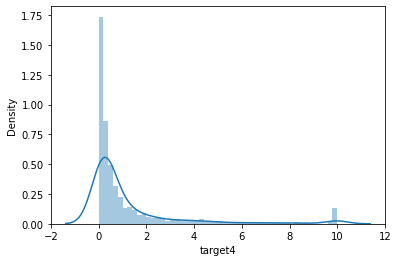

In [121]:
sns.distplot(row_targets.target4.clip(0, 10))

In [95]:
row_targets_high = row_targets.loc[row_targets.target2 >10]
high_score_players = row_targets_high.playerId.unique()
len(high_score_players)

179

In [42]:
pd.set_option('display.max_columns', 100)
row_player_scores = pd.read_json(row['playerBoxScores'])
row_player_scores.head()

,home,gamePk,gameDate,gameTimeUTC,teamId,teamName,playerId,playerName,jerseyNum,positionCode,positionName,positionType,battingOrder,gamesPlayedBatting,flyOuts,groundOuts,runsScored,doubles,triples,homeRuns,strikeOuts,baseOnBalls,intentionalWalks,hits,hitByPitch,atBats,caughtStealing,stolenBases,groundIntoDoublePlay,groundIntoTriplePlay,plateAppearances,totalBases,rbi,leftOnBase,sacBunts,sacFlies,catchersInterference,pickoffs,gamesPlayedPitching,gamesStartedPitching,completeGamesPitching,shutoutsPitching,winsPitching,lossesPitching,flyOutsPitching,airOutsPitching,groundOutsPitching,runsPitching,doublesPitching,triplesPitching,homeRunsPitching,strikeOutsPitching,baseOnBallsPitching,intentionalWalksPitching,hitsPitching,hitByPitchPitching,atBatsPitching,caughtStealingPitching,stolenBasesPitching,inningsPitched,saveOpportunities,earnedRuns,battersFaced,outsPitching,pitchesThrown,balls,strikes,hitBatsmen,balks,wildPitches,pickoffsPitching,rbiPitching,gamesFinishedPitching,inheritedRunners,inheritedRunnersScored,catchersInterferencePitching,sacBuntsPitching,sacFliesPitching,saves,holds,blownSaves,assists,putOuts,errors,chances
0,0,565418,2019-08-26,2019-08-26T19:10:00Z,144,Atlanta Braves,452095,Tyler Flowers,25,2,Catcher,Catcher,702.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
1,1,567617,2019-08-26,2019-08-26T23:05:00Z,158,Milwaukee Brewers,444489,Manny Pina,9,2,Catcher,Catcher,301.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
2,0,565418,2019-08-26,2019-08-26T19:10:00Z,144,Atlanta Braves,571740,Billy Hamilton,9,12,Pinch Runner,Runner,701.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,566438,2019-08-26,2019-08-27T02:10:00Z,147,New York Yankees,642180,Tyler Wade,14,4,Second Base,Infielder,901.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,565765,2019-08-26,2019-08-27T00:15:00Z,133,Oakland Athletics,543302,Chris Herrmann,5,7,Outfielder,Outfielder,402.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [129]:
prev_row_player_scores = pd.read_json(prev_row['playerBoxScores'])
prev_prev_row_player_scores = pd.read_json(prev_prev_row['playerBoxScores'])
prev_prev_prev_row_player_scores = pd.read_json(prev_prev_prev_row['playerBoxScores'])
prev4_row_player_scores = pd.read_json(prev4_row['playerBoxScores'])
prev5_row_player_scores = pd.read_json(prev5_row['playerBoxScores'])
prev6_row_player_scores = pd.read_json(prev6_row['playerBoxScores'])
next_row_player_scores = pd.read_json(next_row['playerBoxScores'])

prev_row_player_scores.head()

,home,gamePk,gameDate,gameTimeUTC,teamId,teamName,playerId,playerName,jerseyNum,positionCode,positionName,positionType,battingOrder,gamesPlayedBatting,flyOuts,groundOuts,runsScored,doubles,triples,homeRuns,strikeOuts,baseOnBalls,intentionalWalks,hits,hitByPitch,atBats,caughtStealing,stolenBases,groundIntoDoublePlay,groundIntoTriplePlay,plateAppearances,totalBases,rbi,leftOnBase,sacBunts,sacFlies,catchersInterference,pickoffs,gamesPlayedPitching,gamesStartedPitching,completeGamesPitching,shutoutsPitching,winsPitching,lossesPitching,flyOutsPitching,airOutsPitching,groundOutsPitching,runsPitching,doublesPitching,triplesPitching,homeRunsPitching,strikeOutsPitching,baseOnBallsPitching,intentionalWalksPitching,hitsPitching,hitByPitchPitching,atBatsPitching,caughtStealingPitching,stolenBasesPitching,inningsPitched,saveOpportunities,earnedRuns,battersFaced,outsPitching,pitchesThrown,balls,strikes,hitBatsmen,balks,wildPitches,pickoffsPitching,rbiPitching,gamesFinishedPitching,inheritedRunners,inheritedRunnersScored,catchersInterferencePitching,sacBuntsPitching,sacFliesPitching,saves,holds,blownSaves,assists,putOuts,errors,chances
0,1,566152,2019-08-25,2019-08-25T20:07:00Z,133,Oakland Athletics,595777,Jurickson Profar,23,10,Designated Hitter,Hitter,600.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,0,566631,2019-08-25,2019-08-25T18:15:00Z,115,Colorado Rockies,475174,Yonder Alonso,13,3,First Base,Infielder,500.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,0.0,6.0
2,1,567616,2019-08-25,2019-08-25T18:10:00Z,158,Milwaukee Brewers,606115,Orlando Arcia,3,6,Shortstop,Infielder,800.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,0.0,6.0
3,0,567425,2019-08-25,2019-08-25T17:10:00Z,143,Philadelphia Phillies,572816,Corey Dickerson,31,7,Outfielder,Outfielder,400.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,0,564997,2019-08-25,2019-08-25T17:05:00Z,139,Tampa Bay Rays,572287,Mike Zunino,10,2,Catcher,Catcher,900.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8.0,0.0,9.0


In [49]:
row_player_scores.tail()

,home,gamePk,gameDate,gameTimeUTC,teamId,teamName,playerId,playerName,jerseyNum,positionCode,positionName,positionType,battingOrder,gamesPlayedBatting,flyOuts,groundOuts,runsScored,doubles,triples,homeRuns,strikeOuts,baseOnBalls,intentionalWalks,hits,hitByPitch,atBats,caughtStealing,stolenBases,groundIntoDoublePlay,groundIntoTriplePlay,plateAppearances,totalBases,rbi,leftOnBase,sacBunts,sacFlies,catchersInterference,pickoffs,gamesPlayedPitching,gamesStartedPitching,completeGamesPitching,shutoutsPitching,winsPitching,lossesPitching,flyOutsPitching,airOutsPitching,groundOutsPitching,runsPitching,doublesPitching,triplesPitching,homeRunsPitching,strikeOutsPitching,baseOnBallsPitching,intentionalWalksPitching,hitsPitching,hitByPitchPitching,atBatsPitching,caughtStealingPitching,stolenBasesPitching,inningsPitched,saveOpportunities,earnedRuns,battersFaced,outsPitching,pitchesThrown,balls,strikes,hitBatsmen,balks,wildPitches,pickoffsPitching,rbiPitching,gamesFinishedPitching,inheritedRunners,inheritedRunnersScored,catchersInterferencePitching,sacBuntsPitching,sacFliesPitching,saves,holds,blownSaves,assists,putOuts,errors,chances
237,1,566340,2019-08-26,2019-08-27T02:10:00Z,135,San Diego Padres,641778,Eric Lauer,46,1,Pitcher,Pitcher,900.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,4.0,8.0,2.0,3.0,2.0,0.0,2.0,8.0,4.0,1.0,6.0,0.0,24.0,0.0,0.0,6.0,0.0,3.0,29.0,18.0,110.0,39.0,71.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,0.0,1.0
238,0,567125,2019-08-26,2019-08-26T23:05:00Z,134,Pittsburgh Pirates,605397,Joe Musgrove,59,1,Pitcher,Pitcher,900.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,3.0,8.0,4.0,2.0,0.0,0.0,1.0,6.0,0.0,0.0,5.0,0.0,23.0,0.0,0.0,6.0,0.0,2.0,23.0,18.0,82.0,21.0,61.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
239,1,567125,2019-08-26,2019-08-26T23:05:00Z,143,Philadelphia Phillies,450306,Jason Vargas,44,1,Pitcher,Pitcher,900.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,6.0,10.0,3.0,4.0,2.0,0.0,0.0,4.0,1.0,0.0,7.0,0.0,24.0,1.0,0.0,6.0,0.0,4.0,25.0,18.0,92.0,38.0,54.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3.0,0.0,0.0,3.0
240,0,565418,2019-08-26,2019-08-26T19:10:00Z,144,Atlanta Braves,527054,Julio Teheran,49,1,Pitcher,Pitcher,900.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,3.0,4.0,8.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,3.0,0.0,19.0,0.0,1.0,6.0,0.0,0.0,22.0,18.0,97.0,39.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,1.0
241,0,567426,2019-08-26,2019-08-26T23:10:00Z,113,Cincinnati Reds,543243,Sonny Gray,54,1,Pitcher,Pitcher,900.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,5.0,6.0,6.0,2.0,0.0,0.0,1.0,6.0,5.0,0.0,2.0,0.0,20.0,0.0,1.0,6.0,0.0,2.0,25.0,18.0,102.0,46.0,56.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,0.0,2.0


In [50]:
row_player_scores.loc[row_player_scores.gamesPlayedBatting.isnull()]

,home,gamePk,gameDate,gameTimeUTC,teamId,teamName,playerId,playerName,jerseyNum,positionCode,positionName,positionType,battingOrder,gamesPlayedBatting,flyOuts,groundOuts,runsScored,doubles,triples,homeRuns,strikeOuts,baseOnBalls,intentionalWalks,hits,hitByPitch,atBats,caughtStealing,stolenBases,groundIntoDoublePlay,groundIntoTriplePlay,plateAppearances,totalBases,rbi,leftOnBase,sacBunts,sacFlies,catchersInterference,pickoffs,gamesPlayedPitching,gamesStartedPitching,completeGamesPitching,shutoutsPitching,winsPitching,lossesPitching,flyOutsPitching,airOutsPitching,groundOutsPitching,runsPitching,doublesPitching,triplesPitching,homeRunsPitching,strikeOutsPitching,baseOnBallsPitching,intentionalWalksPitching,hitsPitching,hitByPitchPitching,atBatsPitching,caughtStealingPitching,stolenBasesPitching,inningsPitched,saveOpportunities,earnedRuns,battersFaced,outsPitching,pitchesThrown,balls,strikes,hitBatsmen,balks,wildPitches,pickoffsPitching,rbiPitching,gamesFinishedPitching,inheritedRunners,inheritedRunnersScored,catchersInterferencePitching,sacBuntsPitching,sacFliesPitching,saves,holds,blownSaves,assists,putOuts,errors,chances
174,0,566438,2019-08-26,2019-08-27T02:10:00Z,147,New York Yankees,518715,Cory Gearrin,35,1,Pitcher,Pitcher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.1,0.0,0.0,3.0,1.0,18.0,8.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
186,0,565765,2019-08-26,2019-08-27T00:15:00Z,133,Oakland Athletics,642152,Lou Trivino,62,1,Pitcher,Pitcher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,5.0,0.0,0.0,1.0,0.0,1.0,6.0,3.0,22.0,10.0,12.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
187,0,566438,2019-08-26,2019-08-27T02:10:00Z,147,New York Yankees,592454,Tommy Kahnle,48,1,Pitcher,Pitcher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,13.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
188,0,566438,2019-08-26,2019-08-27T02:10:00Z,147,New York Yankees,547973,Aroldis Chapman,54,1,Pitcher,Pitcher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,3.0,3.0,10.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
189,1,566438,2019-08-26,2019-08-27T02:10:00Z,136,Seattle Mariners,605538,Matt Wisler,44,1,Pitcher,Pitcher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,12.0,5.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,1,566438,2019-08-26,2019-08-27T02:10:00Z,136,Seattle Mariners,657024,Erik Swanson,50,1,Pitcher,Pitcher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,4.0,3.0,12.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
204,1,565765,2019-08-26,2019-08-27T00:15:00Z,118,Kansas City Royals,622092,Kyle Zimmer,45,1,Pitcher,Pitcher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,2.0,4.0,2.0,0.0,0.0,1.0,1.0,0.0,6.0,0.0,10.0,0.0,0.0,1.1,0.0,4.0,11.0,4.0,51.0,18.0,33.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
205,1,565765,2019-08-26,2019-08-27T00:15:00Z,118,K

In [133]:
pscores1 = joblib.load("data/artifacts/full/train_plscores1.pkl")
pscores2 = joblib.load("data/artifacts/full/train_plscores2.pkl")
pscores3 = joblib.load("data/artifacts/full/train_plscores3.pkl")
pscores4 = joblib.load("data/artifacts/full/train_plscores4.pkl")
pscores5 = joblib.load("data/artifacts/full/train_plscores5.pkl")

In [139]:
players_idx = pscores1['playerId']
dates_p1 = pscores1['date']
pid  = np.where(players_idx == 518715)[0][0]
did = np.where(dates_p1 == 20190826)[0][0]
print(pid, did)
print(pscores1['data'][did, pid])
print(pscores2['data'][did, pid])
print(pscores3['data'][did, pid])
print(pscores4['data'][did, pid])
print(pscores5['data'][did, pid])

1759 358
[ 0. 35.  1.  1. nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
[nan  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[nan  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  2.  0.  0.]
[ 0.1  0.   3.   1.  18.   8.  10.   0.   1.   0.   0.   0.   0.   0.
  0.   0.   0.   nan  nan  nan  nan]


In [43]:
row_player_scores.playerId.nunique(), row_player_scores.teamId.nunique()

(242, 16)

In [48]:
row_player_scores.groupby('playerId')['gamePk'].nunique()

playerId
425794    1
425877    1
430945    1
434158    1
434538    1
         ..
669222    1
669242    1
669257    1
669374    1
670032    1
Name: gamePk, Length: 242, dtype: int64

In [46]:
len(set(high_score_players) & set(row_player_scores.playerId.unique())) / len(high_score_players)

0.5655172413793104

In [45]:
row_player_scores.gamesPlayedBatting.value_counts()

1.0    226
Name: gamesPlayedBatting, dtype: int64

In [51]:
row_player_scores.gamesPlayedPitching.value_counts()

1.0    70
Name: gamesPlayedPitching, dtype: int64

In [52]:
rosters = pd.read_json(row['rosters'])
print(rosters.shape)
rosters.head()

(1296, 5)


,playerId,gameDate,teamId,statusCode,status
0,407845,2019-08-26,120,A,Active
1,425844,2019-08-26,117,A,Active
2,429665,2019-08-26,147,D10,Injured 10-Day
3,430945,2019-08-26,109,A,Active
4,433587,2019-08-26,136,A,Active


In [70]:
rosters.statusCode.value_counts()

A      749
RM     324
D60    113
D10    107
D7       1
BRV      1
FME      1
Name: statusCode, dtype: int64

In [53]:
rosters.playerId.nunique()

1296

In [98]:
len(set(row_targets.loc[row_targets.target2 > 3.0, 'playerId']) - set(rosters.playerId.unique()))

6

In [130]:
high_targets = set(row_targets.loc[row_targets.target4 > 1, 'playerId'])
row_scores = set(row_player_scores.playerId.unique())
prev_row_scores = set(prev_row_player_scores.playerId.unique())
prev_prev_row_scores = set(prev_prev_row_player_scores.playerId.unique())
prev_prev_prev_row_scores = set(prev_prev_prev_row_player_scores.playerId.unique())
prev4_row_scores = set(prev4_row_player_scores.playerId.unique())
prev5_row_scores = set(prev5_row_player_scores.playerId.unique())
prev6_row_scores = set(prev6_row_player_scores.playerId.unique())
next_row_scores = set(next_row_player_scores.playerId.unique())

print(len(high_targets - row_scores), len(high_targets - row_scores - prev_row_scores),
 len(high_targets - row_scores - prev_row_scores - prev_prev_row_scores),
 len(high_targets - row_scores - prev_row_scores - prev_prev_row_scores - prev_prev_prev_row_scores),
 len(high_targets - row_scores - prev_row_scores - prev_prev_row_scores - prev_prev_prev_row_scores - prev4_row_scores),
 len(high_targets - row_scores - prev_row_scores - prev_prev_row_scores - prev_prev_prev_row_scores - prev4_row_scores - prev5_row_scores),
 len(high_targets - row_scores - prev_row_scores - prev_prev_row_scores - prev_prev_prev_row_scores - prev4_row_scores - prev5_row_scores - prev6_row_scores),
 len(high_targets - row_scores - prev_row_scores - prev_prev_row_scores - prev_prev_prev_row_scores - prev4_row_scores - prev5_row_scores - prev6_row_scores - next_row_scores),

 len(high_targets))

404 268 214 195 182 162 154 146 563


In [123]:
high_targets - row_scores - prev_row_scores - prev_prev_row_scores - prev4_row_scores - prev5_row_scores - prev6_row_scores

{112526,
 134181,
 400085,
 400121,
 400284,
 407812,
 408045,
 408236,
 408252,
 408314,
 425844,
 429664,
 429665,
 430832,
 431148,
 431151,
 434670,
 434671,
 434778,
 435079,
 435221,
 444432,
 444876,
 446263,
 446372,
 446386,
 448179,
 448281,
 448602,
 450314,
 451661,
 452104,
 452655,
 452657,
 453064,
 453214,
 453268,
 453562,
 455976,
 456030,
 456034,
 456488,
 456501,
 456665,
 456713,
 457454,
 457705,
 457803,
 458015,
 458675,
 458681,
 460026,
 460077,
 460576,
 461314,
 461833,
 461865,
 462136,
 467055,
 468504,
 471865,
 475582,
 476454,
 476704,
 476883,
 493200,
 493316,
 501896,
 502082,
 502578,
 503285,
 518466,
 518774,
 518813,
 519242,
 519317,
 519381,
 521692,
 542255,
 542921,
 543281,
 543305,
 543768,
 546318,
 546991,
 547943,
 547982,
 570256,
 571506,
 571745,
 571841,
 571851,
 571946,
 572020,
 572073,
 572096,
 572140,
 572191,
 572204,
 572228,
 573185,
 575929,
 579328,
 581527,
 591720,
 592102,
 592122,
 592647,
 594798,
 594828,
 594988,
 

In [102]:
players = pd.read_csv("data/players.csv")

In [126]:
players.loc[players.playerId == 666915]

,playerId,playerName,DOB,mlbDebutDate,birthCity,birthStateProvince,birthCountry,heightInches,weight,primaryPositionCode,primaryPositionName,playerForTestSetAndFuturePreds
145,666915,Bobby Dalbec,1995-06-29,2020-08-30,Seattle,WA,USA,76,227,3,First Base,True


In [127]:
players.loc[players.playerId == 666211]

,playerId,playerName,DOB,mlbDebutDate,birthCity,birthStateProvince,birthCountry,heightInches,weight,primaryPositionCode,primaryPositionName,playerForTestSetAndFuturePreds
88,666211,Taylor Trammell,1997-09-13,2021-04-01,Powder Springs,GA,USA,74,213,8,Outfielder,True


In [ ]:
standings = pd.read_csv("data/")

In [73]:
row_targets.loc[row_targets.playerId.isin(rosters.loc[rosters.statusCode == 'A', 'playerId'])].describe()

,playerId,target1,target2,target3,target4
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,573558.582888,1.475197,9.404442,1.059782,3.411738
std,68069.097753,5.989537,14.734334,4.650685,8.168326
min,282332.000000,0.000000,0.348874,0.000000,0.000000
25%,520217.000000,0.004087,1.708690,0.002185,0.519684
50%,592872.500000,0.044237,4.158738,0.011837,1.207758
75%,623165.250000,0.574603,9.352204,0.138315,3.196493
max,673258.000000,100.000000,100.000000,51.164434,100.000000


In [71]:
row_targets.loc[row_targets.playerId.isin(rosters.loc[rosters.statusCode == 'RM', 'playerId'])].describe()

,playerId,target1,target2,target3,target4
count,307.000000,307.000000,307.000000,307.000000,307.000000
mean,626088.657980,0.005351,0.588654,0.820377,0.369915
std,35049.918543,0.047968,1.767732,8.219144,1.235331
min,446868.000000,0.000000,0.063432,0.000000,0.000000
25%,605503.000000,0.000000,0.214082,0.000000,0.110324
50%,624503.000000,0.000240,0.301300,0.000364,0.197422
75%,656719.000000,0.000962,0.523311,0.001821,0.336779
max,677976.000000,0.708517,23.200127,100.000000,20.984787


In [77]:
row_targets.loc[row_targets.playerId.isin(rosters.loc[rosters.statusCode == 'FME', 'playerId'])].describe()

,playerId,target1,target2,target3,target4
count,1.0,1.000000,1.000000,1.000000,1.000000
mean,607644.0,0.064673,1.990168,0.331447,0.661944
std,NaN,NaN,NaN,NaN,NaN
min,607644.0,0.064673,1.990168,0.331447,0.661944
25%,607644.0,0.064673,1.990168,0.331447,0.661944
50%,607644.0,0.064673,1.990168,0.331447,0.661944
75%,607644.0,0.064673,1.990168,0.331447,0.661944
max,607644.0,0.064673,1.990168,0.331447,0.661944
